## Dataset Description

### Dataset Overview

The dataset used for this research, "Retail Store Sales - Dirty for Data Cleaning", simulates a point-of-sale transaction in a retail store. Specifically, it was made for practicing data analysis and cleaning. Several weaknesses that are frequently present in real-world business datasets, including missing values, inconsistent formats, and potential duplication, are included in the data, which is constructed to reflect actual retail transactions. 

### Data Source and Collection

This dataset is publicly available on Kaggle, created by Ahmed Mohammed. It was formulated to represent the real world complex nature of transactional sales records observed in retail settings. For instructional and analytical reasons, the dataset is structured to mimic realistic scenarios, even if it is not based on the records of a real business.

### Potential Implications of Data Collection

The dataset is simulated, thus it is free of the sampling biases and privacy issues that are usually present in real-world data.  But before any substantial analysis can occur, its purposeful roughness motivates students to use the proper data cleaning techniques.  The difficulties this dataset poses are reflective of real data management issues that arise in real life, even if the insights it offers might not be directly applicable to actual businesses.

### Structure of Data

The dataset is presented in a tabular format, where: 

- Rows represents a unique sales transaction
- Columns represents an important attribute of the transaction (e.g., item, quantity, payment method, etc.)
- The dataset contains 12,575 observations.

### Attribute Description

- Transaction ID - A unique identifier for each transaction. 
- Customer ID - A unique identifier for each costumer. 
- Category - The category of the purchased item. 
- Item - The name of the purchased item. 
- Price Per Unit - The statistic price of a single unit of the item. 
- Quantity - The quantity of the item purchased. 
- Total Spent - The total amount spent on the transaction. 
- Payment Method - The method of payment used. 
- Location - The location where the transaction occured. 
- Transaction Date - The date of the transaction. 
- Discount Applied - Whether discount is applied or not. 

## Data Cleaning

Before any Exploratory Data Analysis can be done to answer our research questions with the dataset, we have to clean the data first in case there are any issues that may result in problems with the analysis.

### Importing, Loading and Reading the Dataset

We begin by importing all the necessary libraries before starting the actual Data Cleaning process.

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from scipy import stats

Next, we load the dataset and call the `.head()` function to view a snippet of the dataset's contents.

In [182]:
df = pd.read_csv('retail_store_sales.csv')
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


Then the `.info()` function to view general information about the dataset.

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


This tells us that the dataset contains 12575 entries, but more importantly, we can quickly identify (3) potential issues we'll need to resolve as we go through the Data Cleaning process:

1. The `Discount Applied` column uses a Dtype of `object` rather than `boolean`.

2. The `Transaction Date` column uses a Dtype of `object` rather than `datetime64[ns]`. But since it also contains day, month, and year in one column, we can split these into their own respective Dtype `int32` columns.

3. The columns `Item`, `Price Per Unit`, `Quantity`, `Total Spent`, and `Discount Applied` all contain null values. Thus, we'll need to look into any inconsistencies or issues with these columns.

But before investigating these specific dataset issues, we'll start off with some preliminary checks by looking for duplicate values and duplicate categorical representations.

### Duplicate Values

In [184]:
df.duplicated().sum()

0

This dataset contains no duplicate values, so **no issues** there.

### Multiple Representations of the Same Categorical Value

The columns to watch out for here are `Category`, `Payment Method`, and `Location`. We have to ensure none of their representations end up being the same as other ones.

We'll start with `Category`.

In [185]:
df['Category'].unique()

array(['Patisserie', 'Milk Products', 'Butchers', 'Beverages', 'Food',
       'Furniture', 'Electric household essentials',
       'Computers and electric accessories'], dtype=object)

Next, `Payment Method`.

In [186]:
df['Payment Method'].unique()

array(['Digital Wallet', 'Credit Card', 'Cash'], dtype=object)

Lastly, `Location`.

In [187]:
df['Location'].unique()

array(['Online', 'In-store'], dtype=object)

Since none of the categories were representing the same thing as other categories, there are **no issues** to be found here.

### Incorrect Datatypes

For this portion, we'll resolve each of the previously mentioned columns individually.

#### Transaction Date Column

In order to make extracting the date into three separate columns easier, we'll first turn the `Transaction Date` into Dtype `datetime64[ns]` rather than its current Dtype of `object`. 

In [188]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              11362 non-null  object        
 4   Price Per Unit    11966 non-null  float64       
 5   Quantity          11971 non-null  float64       
 6   Total Spent       11971 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  8376 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1.1+ MB


Afterwards, we may use `.dt.year`, `.dt.month`, and `.dt.day` to extract each part of the date and put them into their own separate columns.

In [189]:
df['Year'] = df['Transaction Date'].dt.year
df['Month'] = df['Transaction Date'].dt.month
df['Day'] = df['Transaction Date'].dt.day
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Year,Month,Day
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,2024,4,8
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,2023,7,23
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,2022,10,5
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN,2022,5,7
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,2022,10,2


Now that we've created columns `Year`, `Month`, and `Day` we no longer need the `Transaction Date` column, so we'll drop it.

In [190]:
df = df.drop(columns = 'Transaction Date')
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Discount Applied,Year,Month,Day
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,True,2024,4,8
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,True,2023,7,23
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,False,2022,10,5
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,NaN,2022,5,7
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,False,2022,10,2


#### Discount Applied Column

To turn the `Discount Applied` column's Dtype into `boolean` rather than its current Dtype of `object`, we'll use `.astype('boolean')`. 

In [191]:
df['Discount Applied'] = df['Discount Applied'].astype('boolean')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Discount Applied  8376 non-null   boolean
 10  Year              12575 non-null  int32  
 11  Month             12575 non-null  int32  
 12  Day               12575 non-null  int32  
dtypes: boolean(1), float64(3), int32(3), object(6)
memory usage: 1.0+ MB


Confirm the values using `.head()`.

In [192]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Discount Applied,Year,Month,Day
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,True,2024,4,8
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,True,2023,7,23
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,False,2022,10,5
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,<NA>,2022,5,7
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,False,2022,10,2


### Missing Data

For this portion, we'll resolve each of the previously mentioned columns individually.

#### Item Column

One simple solution would be to drop all rows containing null values in the Item column. However, let's take a quick glance at the `Category` and `Item` columns.

In [193]:
df[['Category', 'Item']].head(8)

,Category,Item
0,Patisserie,Item_10_PAT
1,Milk Products,Item_17_MILK
2,Butchers,Item_12_BUT
3,Beverages,Item_16_BEV
4,Food,Item_6_FOOD
5,Patisserie,NaN
6,Food,Item_1_FOOD
7,Furniture,NaN


Each item has the pattern `Item_##_CATEGORYID` with the category identifier being based on the value in `Category`. So while we can't figure out what item number was chosen, we can still figure out the category identifier for each item. After all, the `Category` column contains 0 null values.

So rather than dropping the null values for `Item` and losing potentially precious data, we can instead fill up all the rows for `Item` using only the category identifier.

We'll first create a dictionary of key-value pairs, with the content of `Category` serving as our key and the category identifier as the value.

In [194]:
category_id = {'Patisserie':'Item_NA_PAT', 'Milk Products':'Item_NA_MILK', 'Butchers':'Item_NA_BUT', 'Beverages':'Item_NA_BEV',
               'Food':'Item_NA_FOOD', 'Furniture':'Item_NA_FUR', 'Electric household essentials':'Item_NA_EHE',
               'Computers and electric accessories':'Item_NA_CEA'}
category_id

{'Patisserie': 'Item_NA_PAT',
 'Milk Products': 'Item_NA_MILK',
 'Butchers': 'Item_NA_BUT',
 'Beverages': 'Item_NA_BEV',
 'Food': 'Item_NA_FOOD',
 'Furniture': 'Item_NA_FUR',
 'Electric household essentials': 'Item_NA_EHE',
 'Computers and electric accessories': 'Item_NA_CEA'}

In [195]:
df['Item'] = df['Item'].fillna(df['Category'].map(category_id))
df[['Category', 'Item']].head(8)

,Category,Item
0,Patisserie,Item_10_PAT
1,Milk Products,Item_17_MILK
2,Butchers,Item_12_BUT
3,Beverages,Item_16_BEV
4,Food,Item_6_FOOD
5,Patisserie,Item_NA_PAT
6,Food,Item_1_FOOD
7,Furniture,Item_NA_FUR


And if we run `.info()` on our dataset, `Item` should no longer contain any null values.

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              12575 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Discount Applied  8376 non-null   boolean
 10  Year              12575 non-null  int32  
 11  Month             12575 non-null  int32  
 12  Day               12575 non-null  int32  
dtypes: boolean(1), float64(3), int32(3), object(6)
memory usage: 1.0+ MB


#### Price Per Unit Column

Filling up the null values for `Price Per Unit` is doable as long as both `Quantity` and `Total Spent` contain values. All we have to do is compute what the price per unit would be based on the quantity and total spent.

In [197]:
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Total Spent']/df['Quantity'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              12575 non-null  object 
 4   Price Per Unit    12575 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Discount Applied  8376 non-null   boolean
 10  Year              12575 non-null  int32  
 11  Month             12575 non-null  int32  
 12  Day               12575 non-null  int32  
dtypes: boolean(1), float64(3), int32(3), object(6)
memory usage: 1.0+ MB


#### Quantity and Total Spent Columns

Suspiciously enough, both `Quanity` and `Total Spent` contain the same number of null values. We'll investigate them first to see if they both share null values.

In [198]:
(df['Quantity'].isna() == df['Total Spent'].isna()).all()

True

While we were able to fill up `Price Per Unit` using `Quantity` and `Total Spent` as reference, the opposite doesn't hold true. Since we can't fill these missing values, we'll delete all rows containing null values in both columns

In [199]:
df.dropna(subset = ['Quantity', 'Total Spent'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11971 entries, 0 to 12574
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    11971 non-null  object 
 1   Customer ID       11971 non-null  object 
 2   Category          11971 non-null  object 
 3   Item              11971 non-null  object 
 4   Price Per Unit    11971 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    11971 non-null  object 
 8   Location          11971 non-null  object 
 9   Discount Applied  7983 non-null   boolean
 10  Year              11971 non-null  int32  
 11  Month             11971 non-null  int32  
 12  Day               11971 non-null  int32  
dtypes: boolean(1), float64(3), int32(3), object(6)
memory usage: 1.1+ MB


#### Discount Applied Column

Removing the null values in `Discount Applied` would be a huge loss in data, considering how many rows would be removed.

In [200]:
# All columns have the same number of non-null values except for Discount Applied
df['Item'].count() - df['Discount Applied'].count()

3988

As you can see, we would lose `3988` rows of data. Instead of dropping the rows with null values, let's instead calculate for the mode. We use mode here over mean and median because the `Discount Applied` column contains categorical data.

In [201]:
df['Discount Applied'] = df['Discount Applied'].fillna(df['Discount Applied'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11971 entries, 0 to 12574
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    11971 non-null  object 
 1   Customer ID       11971 non-null  object 
 2   Category          11971 non-null  object 
 3   Item              11971 non-null  object 
 4   Price Per Unit    11971 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    11971 non-null  object 
 8   Location          11971 non-null  object 
 9   Discount Applied  11971 non-null  boolean
 10  Year              11971 non-null  int32  
 11  Month             11971 non-null  int32  
 12  Day               11971 non-null  int32  
dtypes: boolean(1), float64(3), int32(3), object(6)
memory usage: 1.1+ MB


### Inconsistent Formatting

In [202]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Discount Applied,Year,Month,Day
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,True,2024,4,8
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,True,2023,7,23
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,False,2022,10,5
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,True,2022,5,7
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,False,2022,10,2


Columns `Transaction ID`, `Customer ID`, and `Item` all follow a specific formatting. Let's make sure there are 0 inconsistencies and that this format is followed throughout the entire dataset by using regex.

In [203]:
# Starts with TXN_ and ends with 7 digits
txn_regex = r"^TXN_\d{7}$"
invalid_txn = df[~df['Transaction ID'].str.match(txn_regex)]

invalid_txn.empty

True

In [204]:
# Starts with CUST_ and ends with 2 digits
cust_regex = r"^CUST_\d{2}$"
invalid_cust = df[~df['Customer ID'].str.match(cust_regex)]

invalid_cust.empty

True

In [205]:
# Starts with Item_, then 1 or 2 letters/digits, and ends with 3 or 4 letters
item_regex = r"^Item_\w{1,2}_[A-Z]{3,4}$"
invalid_item = df[~df['Item'].str.match(item_regex)]

invalid_item.empty

True

There are zero inconsistencies with the formatting, so **no issues** here.

## Research Question & Exploratory Data Analysis

### The Research Question

Now that the data has been sufficiently clean, it is ready for the Exploratory Data Analysis (EDA). However, before beginning it is important to decide on a research question that will govern how the EDA is carried out. For this study, the research question is: <b> When are customers willing to make bulk purchases? </b>. To answer this, we will be looking for the variables that correlate with high amounts of items bought

### Exploratory Data Analysis

To begin with, let us first find the summary statistics of the quantity of items per purchase. This is important because we need to know values like the average number of orders so we can find patterns between orders that exceed this average.


Let us first find the mean of the quantity column:

In [206]:
print('{:.2f}'.format(df['Quantity'].mean()))

5.54


Now, let us look for the median of the same column: 

In [207]:
print(df['Quantity'].median())

6.0


Finally, we will take a look at the mode of the quantity column

In [208]:
print(df['Quantity'].mode())

0    10.0
Name: Quantity, dtype: float64


Using the mean and the median, we can see that the average number of orders made is around 5-6. One concern is that the mode of of the column is much higher than the mean and median of the column. This calls into question the distribution of the graph which we can verify in a few different ways:

The first is finding the standard distribution of the specific variable:

In [209]:
print('{:.2f}'.format(df['Quantity'].std()))

2.86


The second method we can use is visualizing the distribution of the variable using a histogram. We are using this kind of graph because it is easy to visualize the spread of data by binning numerous observations into groups based on the quantity of each purchase.

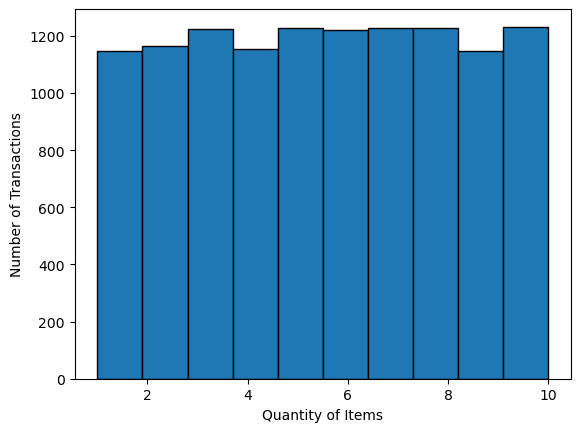

In [210]:

mpl.hist(df['Quantity'], edgecolor = 'black')
mpl.xlabel('Quantity of Items')
mpl.ylabel('Number of Transactions')
mpl.show()

Given this graph, we can see that the data is unimodal (10) with a slight negative skew. This means that a very slight majority of the observations are bunched on the right side of the graph. However, as can be told with the standard deviation and mean, most of the observations are clumped in the 4-7 range. 

For the purpose of this research, we will be considering purchases with 6 or above as bulk purchases as these are all purchases that are above the average quantity of items per purchase. Let us first begin by limiting the database to observations with a quantity of 6 or above.

In [211]:
df_filtered = df[df['Quantity'] >= 6]

Let's do some measures of the central tendancy and spread of the quantity column.

In [212]:
print('{:.2f}'.format(df_filtered['Quantity'].mean()))

7.99


In [213]:
print(df_filtered['Quantity'].mode())

0    10.0
Name: Quantity, dtype: float64


In [214]:
print('{:.2f}'.format(df_filtered['Quantity'].median()))

8.00


In [215]:
print('{:.2f}'.format(df_filtered['Quantity'].std()))

1.42


This subset of data will be used when we want to compare the variables of orders above the average quantity.In other cases when we want to see general trends, the entire dataset will be used instead. 

Now that we have a better idea of the basic measurements of the quantity column, let's look at the first EDA question

### Question 1: Is there a relationship between the Quantity of Items and the Price per Unit?

We will deal with this question in two steps: first lets visualize the distribution of the Price Per Unit per Quantity value. We can easily visualize this data using a boxplot.

<Axes: title={'center': 'Price Per Unit'}, xlabel='Quantity'>

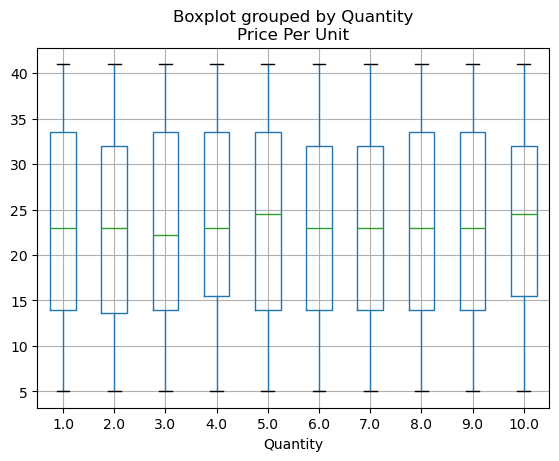

In [216]:
df.boxplot(by = 'Quantity', column = ['Price Per Unit'], grid = 'False')

The box column suggests that the price per unit generally ranges from ~15 to ~33 with the median of each group being in the low to mid 20s. We can also see that there are no outliers present in the price column of this dataset. Knowing how this column is distributed is important because from the boxplot we can see that there is no notable relationships between the Price per Unit and the Quantity in these observations. This means that there is no need for further testing to verify any statistical significance for these relationships. 

Before moving on, let us first see if there is a correlation between the two variables using the Pearson Correlation method. We choose this method because we want to see if a linear relationship is present between these two variables.

In [217]:
df['Quantity'].corr(df['Price Per Unit'])

0.010356936512770858

The value of 0.01036 (when rounded to 4 decimal places) is very close to 0. This is enough to safely conclude that there is no correlative relationship between prices per unit and the quantity of each purchase. To conclude this EDA, it can be hypothesized that there is no correlation nor any potentially meaningful relationships. 

### Question 2: Is there a relationship between the Quantity of Items and the Total Spent per purchase?

The next variable we will analyze for relationships is the Total Amount Spent. The Total Spent column is comprised of continuous numerical data that indicates the total amount of money that was spent in the transaction, after taking discounts into account. Given the fact that the Total Amount column is similar to the Price per Unit column in terms of data type, we will use the same method to analyze for any possible relationships. First, we will look at the boxplot to investigate if there are any possibly meaningful distributions among the the Total Amount observations per Quantity of Item value


<Axes: title={'center': 'Total Spent'}, xlabel='Quantity'>

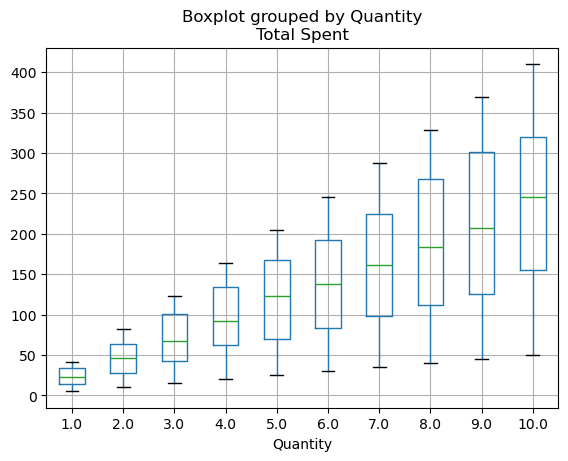

In [218]:
df.boxplot(by = 'Quantity', column = ['Total Spent'], grid = 'False')

Here, there is a potentially interesting relationship. As the quantity of items increases, several values grow larger. First is the median which is at its lowest when purchases are at 6 and at their peak when purchases are at 10. Similarly, both upper and lower quartiles, and the upper whisker increase by a noteable amount as the Quantity value increases. After EDA, we can test if these differences are meaningfully significant in various ways. The first is by performing an anova to see if any one group has a statistically significant difference in its mean compared to the other groups. Another way is to perform an unpaired t-test for every group combination if we want to identify which group has a statistically significant difference, if one is present.

Finally, let us use Pearson Correlation if there is a direct correlation between the Quantity of Items and the Total Spent variables.

In [219]:
df_filtered['Quantity'].corr(df_filtered['Total Spent'])

0.37276505055541465

A value of 0.3729 is much closer to 1 compared to the Pearson coefficient that was given by testing the Price per Unit and Quantity. This means that there is a higher chance that there is an actual correlation between these two values. However, since the value is still quite far from 1, that chance is still quite small. However, further testing is still warranted for the statistical significance of the previous relationships that were noted.

### Question 3: Is there a relationship between the Quantity Purchased and whether or not a discount was applied to the purchase?

Now that we have tested for 2 numerical columns within this dataset, let us now try to see if there is a strong relationship between the Quantity Purchased and the Discount Applied variables. The process in examining this will be slightly different as the Discount Applied variable is categorical, not numeric. To begin with, let us understand the distribution of Discount Applied by looking at the mode, since median and mean cannot be calculated. Furthermore, since we are only interested in observations with a Quantity value of 6 and above, we will used the filtered dataset for this particular analysis.

In [220]:
print(df_filtered['Discount Applied'].mode())

0    True
Name: Discount Applied, dtype: boolean


We can see that a majority of the orders with an above average quantity have some sort of discount applied. Fianlly, to get an idea of the difference let us use a bar chart. Using a bar chart in this instance is best because we are interested in the number of observations per category: discount applied, and no discount applied.

<Axes: xlabel='Discount Applied'>

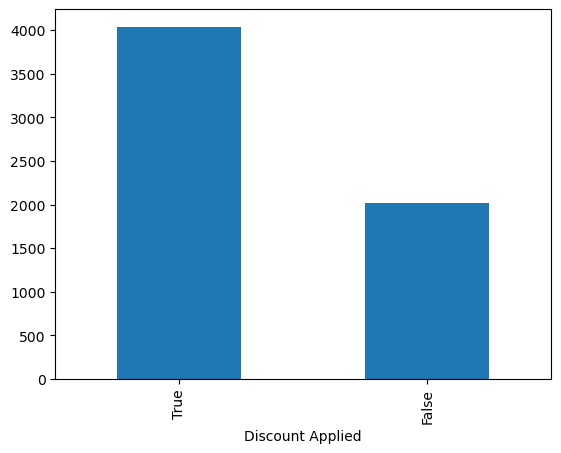

In [221]:
df_filtered['Discount Applied'].value_counts().plot.bar()

Here, we can see a difference of almost 2000 purchases. We can do further testing to see if this difference is statistically significant. This is done via a test of goodness using the chi-square test. By assuming that the expected value is 50/50, we can see if this difference actually means something or if it is inisignificant. For now, we can hypothesize that customers are more likely to buy more if there is a discount applied to the order.

### Question 4: Is the quantity of a purchase likely to be higher in a specific month?

Lets move to another important variable in the dataset: the date of the purchase. For this EDA question, we will focus on the purchases for month. This is so that we can get more specific data than we would by grouping year. At the same time, we would be able to make a comprehensible chart, which wouldn't be possible if we decided to group purchases based on days, which would lead to thousands of datapoints to analyze. 

Let us first take a look at the table when we group it by month

In [222]:
df_filtered_months = df_filtered.groupby(['Month', 'Year'])
df_filtered_months.count()

Transaction ID  Customer ID  Category  Item  Price Per Unit  \
Month Year                                                                
1     2022             204          204       204   204             204   
      2023             191          191       191   191             191   
      2024             175          175       175   175             175   
      2025              97           97        97    97              97   
2     2022             175          175       175   175             175   
      2023             151          151       151   151             151   
      2024             150          150       150   150             150   
3     2022             153          153       153   153             153   
      2023             159          159       159   159             159   
      2024             162          162       162   162             162   
4     2022             166          166       166   166             166   
      2023             143          143       143   143             143   
      2024             181          181       181   181             181   
5     2022             160          160       160   160             160   
      2023             158          158       158   158             158   
      2024             173          173       173   173             173   
6     2022             157          157       157   157             157   
      2023             175          175       175   175             175   
      2024             171          171       171   171             171   
7     2022             176          176       176   176             176   
      2023             173          173       173   173             173   
      2024             174          174       174   174             174   
8     2022             172          172       172   172             172   
      2023             156          156       156   156             156   
      2024             150          150       150   150             150   
9     2022             173          173       173   173             173   
      2023             165          165       165   165             165   
      2024             158          158       158   158             158   
10    2022             158          158       158   158             158   
      2023             154          154       154   154             154   
      2024             160          160       160   160             160   
11    2022             160          160       160   160             160   
      2023             143          143       143   143             143   
      2024             165          165       165   165             165   
12    2022             155          155       155   155             155   
      2023             163          163       163   163             163   
      2024             197          197       197   197             197   

            Quantity  Total Spent  Payment Method  Location  Discount Applied  \
Month Year                                                                      
1     2022       204          204             204       204               204   
      2023       191          191             191       191               191   
      2024       175          175             175       175               175   
      2025        97           97              97        97                97   
2     2022       175          175             175       175               175   
      2023       151          151             151       151               151   
      2024       150          150             150       150               150   
3     2022       153          153             153       153               153   
      2023       159          159             159       159               159   
      2024       162          162             162       162               162   
4     2022       166          166             166       166               166   
      2023       143          143

Taking a look at the dataset, there is an important detail we first have to attend to. Specifically in the month of January: if you look closely you can see that some orders were made in the year 2025. This is something exclusive only to January. In order to make sure that every month is on equal ground, lets drop all observations of orders made in the year 2025.

In [223]:
df_no2025 = df_filtered[df_filtered['Year'] != 2025]

Perfect! Now we can check if there is a relationship between the quantity of purchase and any particular month by measuring the amount of orders above the average that each month has. This can 

<Axes: xlabel='Month'>

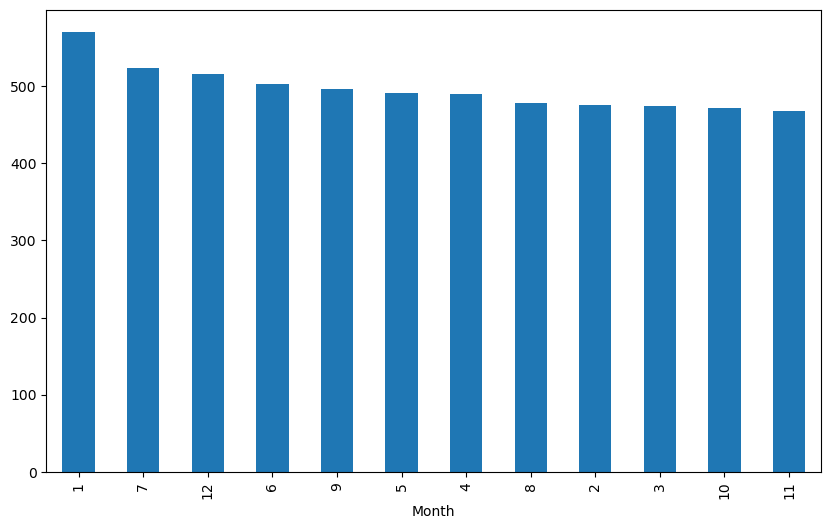

In [224]:
df_no2025['Month'].value_counts().plot.bar(figsize= (10,6))

As can be seen, the month of January has the most orders above the average in our new filtered dataset. Thus, we can hypothesize that customers are more willing to make bulk purchases in the month of January compared to other months.

### Question 5: How does the distribution of payment methods differ between bulk and non-bulk purchases? 

This section investigates whether customers' payment methods vary according on the number of items they buy.  In particular, we aim to ascertain whether there are significant differences in payment preferences between non-bulk purchases (less than six items) and bulk purchases (defined as transactions containing six or more items).  Businesses can use this type of information to better analyze consumer behavior at the time of sale and possibly improve their checkout or marketing tactics.

In order to determine whether a transaction is eligible for a bulk order, we first added a new column to our dataset called Bulk Purchase.  Comparing the number of things per transaction allows for this:

In [225]:
df['Bulk Purchase'] = df['Quantity'] >= 6
df[['Quantity', 'Bulk Purchase']].head(10)

,Quantity,Bulk Purchase
0,10.0,True
1,9.0,True
2,2.0,False
3,9.0,True
4,7.0,True
5,10.0,True
6,8.0,True
8,1.0,False
9,3.0,False
10,9.0,True


After distinguishing bulk transactions from non-bulk transactions, we look at the differences in payment methods between the two categories.  We accomplished this by creating a cross-tabulation that displays the quantity of transactions for every payment method under every purchase category:

In [226]:
payment_counts = pd.crosstab(df['Bulk Purchase'], df['Payment Method'])
payment_counts

Payment Method,Cash,Credit Card,Digital Wallet
Bulk Purchase,,,
False,2013,1976,1929
True,2090,1951,2012


The raw number of times each payment method was utilized based on whether the transaction was a bulk or non-bulk purchase is displayed in this table. To better understand and compare the patterns, we used a grouped bar chart:

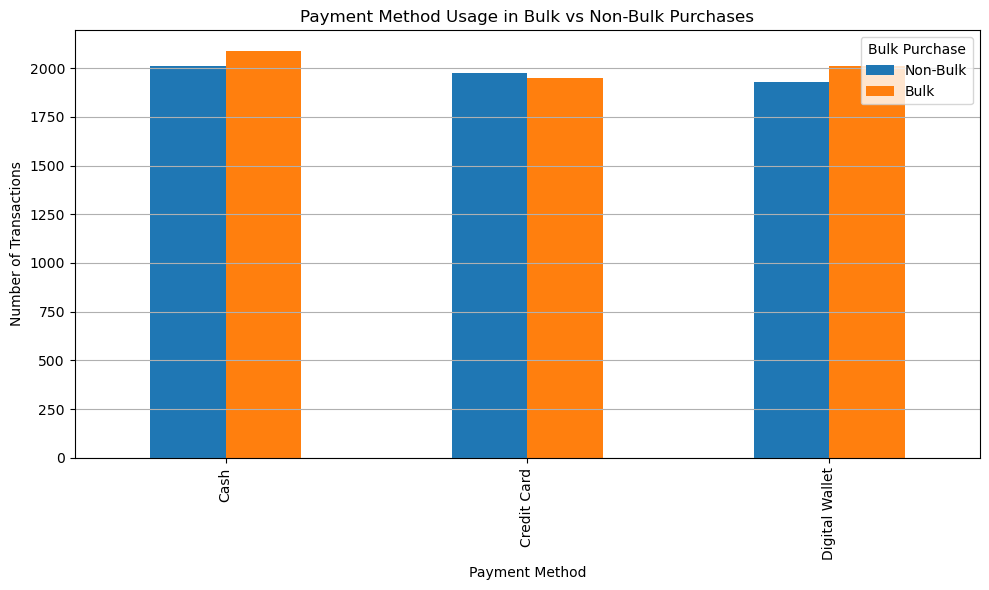

In [227]:
payment_counts.T.plot(kind='bar', figsize=(10,6))
mpl.xlabel('Payment Method')
mpl.ylabel('Number of Transactions')
mpl.title('Payment Method Usage in Bulk vs Non-Bulk Purchases')
mpl.legend(title='Bulk Purchase', labels=['Non-Bulk', 'Bulk'])
mpl.grid(axis='y')
mpl.tight_layout()
mpl.show()

From the resulting bar chart, a few distinct patterns emerge. Cash and digital wallets appear to be the most common payment methods for bulk purchases. This might suggest that customers who are making larger purchases prefer to use immediate or mobile-based payment options. On the other hand, credit cards are more dominant in non-bulk purchases, indicating that smaller purchases are more likely to be made using credit, possibly due to convenience or reward-point considerations.

These patterns imply that payment methods vary depending on the kind of transaction.  While credit cards may be used more frequently for minor purchases, bulk buyers appear to favor quicker or more flexible choices like cash or digital wallets.  The visual distribution gives a clear indication that payment preferences change based on transaction size.

## Data Mining

For this portion, it's important to first identify what kind of Data Mining technique should be used. Since our Research Question is "<b>When are customers willing to make bulk purchases?</b>," it's clear we're trying to identify any patterns and conditions that make bulk purchases likely to occur. For this reason, we will be using <b>Association Rule Mining</b> and the Python file `rule_miner.py` for this Data Mining section. 

In [228]:
from rule_miner import RuleMiner

But before we can actually use the `rule_miner.py` file, we need to make sure our dataset has been properly preprocessed.

### Data Preprocessing

Since we are dealing with Categorical data, let's use <b>One-Hot Encoding</b> to convert all our ncessary categorical data into numerical data that can be used by the `rule_miner.py` file. One way to do it is using the `.get_dummies` function built-in into Pandas.

In [229]:
df_features = ['Category', 'Payment Method', 'Month']
df_encoded = pd.get_dummies(df[df_features].astype(str))

#Convert from Dtype bool to int64
df_encoded = df_encoded.replace({'True': 1, 'False': 0}).astype('int64')

#Remove spaces from column names
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')

df_encoded

,Category_Beverages,Category_Butchers,Category_Computers_and_electric_accessories,Category_Electric_household_essentials,Category_Food,Category_Furniture,Category_Milk_Products,Category_Patisserie,Payment_Method_Cash,Payment_Method_Credit_Card,...,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
12571,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
12572,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
12573,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


We also need to include the columns `Location`, `Discount Applied`, and `Bulk Purchase` as they are relevant to answering our main research question. We did not initially include these in the One-Hot Encoding process because they're already numerical and/or binary data.

In [230]:
df[['Location', 'Discount Applied', 'Bulk Purchase']]

,Location,Discount Applied,Bulk Purchase
0,Online,True,True
1,Online,True,True
2,Online,False,False
3,Online,True,True
4,Online,False,True
...,...,...,...
12570,In-store,True,False
12571,Online,False,True
12572,Online,True,True
12573,Online,True,True


`Location` only has 2 values, being `Online` or `In-store`, so we can use it as a single column as long as we dictate which value should be seen as `1` and `0`. For this case, we'll make `Online` be `1` and rename the column to `Location_Online` in `df_encoded`.

In [231]:
df_encoded['Location_Online'] = df['Location'].map({'Online': 1, 'In-store': 0})
df_encoded['Location_Online']

0        1
1        1
2        1
3        1
4        1
        ..
12570    0
12571    1
12572    1
12573    1
12574    1
Name: Location_Online, Length: 11971, dtype: int64

`Discount Applied` and `Bulk Purchase` already True/False values so we just need to convert them into `1` and `0`.

In [232]:
df_encoded['Discount_Applied'] = df['Discount Applied'].map({True: 1, False: 0})
df_encoded['Bulk_Purchase'] = df['Bulk Purchase'].map({True: 1, False: 0})

df_encoded[['Discount_Applied', 'Bulk_Purchase']]

,Discount_Applied,Bulk_Purchase
0,1,1
1,1,1
2,0,0
3,1,1
4,0,1
...,...,...
12570,1,0
12571,0,1
12572,1,1
12573,1,1


With Data Preprocessing done, we can move onto Association Rule Mining.

### Association Rule Mining

We begin by instantiating the `RuleMiner` class with a `support_t` of `30` and a `confidence_t` of `0.6`. The `support_t` and `confidence_t` were chosen to be `30` and `0.6` respectively because other pairs of values led to either hundreds of rules or none at all in the final result.

In [233]:
rule_miner = RuleMiner(30, 0.6)

Then we get the association rules using the `.get_association_rules` function from our `rule_miner.py` file.

In [234]:
rules = rule_miner.get_association_rules(df_encoded)

Since our Research Question is specifically focused on when Bulk Purhcases happen, we want to specifically filter `rules` to only show what contains `Bulk_Purchase` in the right-hand side. We also want to know the confidence to see how certain these rules are.

In [235]:
# filter the rules so that only bulk purchase rules are returned
bulk_purchase_rules = [
    (lhs, rhs) for lhs, rhs in rules 
    if 'Bulk_Purchase' in rhs
]

# print the bulk purchase rules with their confidence
for lhs, rhs in bulk_purchase_rules:
    confidence = rule_miner.get_confidence(df_encoded, (lhs, rhs))
    print(f"{lhs} -> {rhs} | {confidence:.2f}")

['Category_Furniture', 'Discount_Applied', 'Location_Online', 'Month_9'] -> ['Bulk_Purchase'] | 0.61
['Category_Milk_Products', 'Discount_Applied', 'Location_Online', 'Month_1'] -> ['Bulk_Purchase'] | 0.60
['Discount_Applied', 'Location_Online', 'Month_2', 'Payment_Method_Digital_Wallet'] -> ['Bulk_Purchase'] | 0.62


## Statistical Inference

The next step in the research for this data step is to verify our hypotheses via a series of hypothesis tests. Many of these tests were mentioned in their respective research questions, but they will be reiterated in this section with justification as to why that test is best suited to answer that question.

### Test #1: Anova to test any statistically significant difference among the average price per unit of item bought per quantity group

During the EDA, it was noted that there seemed to be no special patterns between the price per unit of item bought and the quantity of the items that were bought. However, even though we did a correlation test to prove that there is no correlation, it remains to be seen if there is a statistically significant difference among the average price per unit among the quantity groups. This is something important to test because it could clue us in if a certain quantity group has a higher or lower average price per unit compared to others, which could be a signifier of things like customer psyche.

For this hypothesis test we will have the following:
<br>
<b> Null Hypothesis: </b> There is no statistically significant difference among the average prices spent per quantity
<b> Alternative Hypothesis: </b> There is a statistically significant difference among the average prices spent per quantity

We will be using a significance level of 0.05

Beginning with setting up the groups, let us first set up an array for each group of Quantity purchased

In [236]:
group1 = []
group2 = []
group3 = []
group4 = []
group5 = []
group6 = []
group7 = []
group8 =[]
group9 = []
group10 = []

Now that each quantity group has its own array, we will pass all the observations into their respective array

In [237]:

groupMap = {
    1: group1, 2: group2, 3: group3, 4: group4, 5: group5,
    6: group6, 7: group7, 8: group8, 9: group9, 10: group10
}



for _,row in df.iterrows():
    amnt = row['Quantity']
    price = row['Price Per Unit']
    if amnt in groupMap:
        groupMap[amnt].append(price)



With each quantity group now assigned its proper price observations, we can now perform the anova and the f-statistic and its corresponding p-score

In [238]:
fstat, pscore = stats.f_oneway(group1,group2,group3,group4,group5,group6,group7,group8,group9,group10)
print("F-Statistic: {:.2f}".format(fstat))
print("P-Score: {:.2f}".format(pscore))

F-Statistic: 0.79
P-Score: 0.63


With the P-Score being well above 0.05, we <b> fail to reject </b> the null hypothesis. Thus, we have to believe that there is no significant difference between the average prices per quantity of item. This further supports our earlier hypothesis that there is no correlation/relationship between the two variables.

### Test #2: Anova to test for any statistically significant differences among the total price of purchase per quantity group


During the EDA, we found a potentially interesting relationship between the total price of the transaction and the number of items bought. And while the correlation test yielded results of no correlation, it is still important to test if there are any statistically significant differences among these groups. Thus, the second question has a similar setup to the first, and has a similar hypothesis test. Similar to the previous question, while we had performed a correlation test and came to the conclusion that a relationship was unlikely, we can do further testing via and anova. By seeing if the average total spent per purchase has a statistical difference or not, we can have a more concrete answer as to whether or not these two variables have a relationship. Thus, we set the hypothesis as so:

<br>
<b> Null Hypothesis: </b> There is no statistically significant difference among the average total per quantity

<b> Alternative Hypothesis: </b> There is a statistically significant difference among the average total per quantity

We can use a smiliar setup as we did last time, first let us map the total price to their proper categories

In [239]:
totalgroup1 = []
totalgroup2 = []
totalgroup3 = []
totalgroup4 = []
totalgroup5 = []
totalgroup6 = []
totalgroup7 = []
totalgroup8 = []
totalgroup9 = []
totalgroup10 = []


groupMap = {
    1: totalgroup1, 2: totalgroup2, 3: totalgroup3, 4: totalgroup4, 5: totalgroup5,
    6: totalgroup6, 7: totalgroup7, 8: totalgroup8, 9: totalgroup9, 10: totalgroup10
}



for _,row in df.iterrows():
    amnt = row['Quantity']
    total = row['Total Spent']
    if amnt in groupMap:
        groupMap[amnt].append(total)


Now, let us get the do the annova

In [240]:
fstat, pscore = stats.f_oneway(totalgroup1,totalgroup2,totalgroup3,totalgroup4,totalgroup5,totalgroup6,totalgroup7,totalgroup8,group9,group10)
print("F-Statistic: {:.2f}".format(fstat))
print("P-Score: {:.2f}".format(pscore))

F-Statistic: 1851.29
P-Score: 0.00


This shows a very strong result. The fact that the P-Score is 0.00 suggests that the true score is much lower than 0.00. Thus with this score being much lower than 0.05, we can <b> reject the null hypothesis </b> and believe that there is a statistically significant difference among the groups. This, combined with the graphs from our earlier hypothesis, lends us to believe that there <b> is </b> a relationship between the amount of items that people buy and the total amount spent per purchase.


### Test #3: Is there a correlation between bulk purchases and the application of discounts?

The next hypothesis is based on the findings of the bulk purchases and the application of discounts in the EDA. It was found that among the bulk purchases, a large majority of them are made with a discount being applied. Thus, it was hypothesized that these two variables share a relationship. In order to test if that is the case, we will be using a Chi-Square Test of Independence as this is the best way to check for correlation between two categorical variables. The test will be set up as follows:

<b> Null Hypothesis: </b> There is no relationship between the two variables

<b> Alternative Hypothesis: </b> There is a relationship between the two variables

We will be using a significance level of 0.05

We can first start by compiling the two categories into a single table


In [241]:
discountbulktable = pd.crosstab(df['Bulk Purchase'], df['Discount Applied'])
discountbulktable

Discount Applied,False,True
Bulk Purchase,,
False,1949,3969
True,2015,4038


Now that we have a table, we can use Pearson's Chi-Square Test of Independence with the function chi2_contingency()

In [242]:
chi2, pvalue, dof, expected = stats.chi2_contingency(discountbulktable)
print("P-Value: {:.2f}".format(pvalue))

P-Value: 0.69


With a P Score of 0.69, well over 0.05, we <b> fail to reject </b> the null hypothesis and conclude that there is no correlative relationship between the application of a discount and whether or not the customer will make a bulk purchase.


### Test 4: Using Chi-Square Test of good fit to check if the distribution per month of bulk purchases matches the distribution of the whole dataset 

During EDA, we found that a large majority of bulk purchases were made in January. To test if the distribution seen in the EDA matches what is found in the whole database, we will be performing another Chi square test. We will set the hypothesis test as thus:

<b> Null Hypothesis: </b> The distribution of bulk orders per month is representative of the entire dataset

<b> Alternative Hypothesis: </b> The distribution of bulk orders per month is not representative of the entire dataset

We will be using a significance level of 0.05

Let's start by getting the expected amount of observations

In [243]:
expectedMonthObservations = df[df['Year'] != 2025]
expectedMonthObservations = expectedMonthObservations['Month'].value_counts().sort_index()
print(expectedMonthObservations)



Month
1     1093
2      916
3      965
4      953
5      978
6      991
7     1039
8      992
9      984
10     934
11     950
12     974
Name: count, dtype: int64


We can use the previously defined "df_no2025" as the observations of the sample

In [244]:
sampleMonthObservations = df_no2025['Month'].value_counts().sort_index()
print(sampleMonthObservations)

Month
1     570
2     476
3     474
4     490
5     491
6     503
7     523
8     478
9     496
10    472
11    468
12    515
Name: count, dtype: int64


Before using the chi square function, we must first scale down the full observations to the size of the sample observations

In [245]:
expectedMonthObservations = expectedMonthObservations * (sampleMonthObservations.sum()/expectedMonthObservations.sum())

Finally, we can use the chi square function in order to get the chi statistic and the p-value

In [246]:
monthChi2, monthPscore = stats.chisquare(sampleMonthObservations, expectedMonthObservations)
print("Chi square statistic: {:.2f}".format(monthChi2))
print("P Score: {:.2f}".format(monthPscore))

Chi square statistic: 3.93
P Score: 0.97


Similar to the previous hypothesis test, we <b> fail to reject </b> the null hypothesis. Meaning that it is likely that the distribution of bulk orders per month is representative of the distribution of orders per month in general. This means that it is likely that there is no special relationship between any month variable and the likelihood of making bulk purchases.

###  Test #5: Checking the correlation between payment method and bulk purchases

During the EDA, we compared the distributions of the different kinds of payment methods and the bulk purchases and hypothesized that the two variabales may have  a relationship. In order to verify if there is a statistically significant relationship, a Pearson's Chi-Square Test will be performed.

This hypothesis test is set up in the following way:

<b> Null Hypothesis: </b> There is no statistically significant relationship between bulk purchases and the method of payment

<b> Alternative Hypothesis: </b> There is a statistically sginificant relationship between bulk purchases and the method of payment

We can use the previously defined payment_counts to call the chi2_contingency() function which performs this test automatically

In [247]:
chi2, pvalue, dof, expected = stats.chi2_contingency(payment_counts)
print("P-Value: {:.2f}".format(pvalue))

P-Value: 0.40


With a P-Value of 0.4, we <b> fail to dismiss </b> the null hypothesis, which means there is no correlation or statsitically significant relationship between the method of payment used in the transaction and whether or not that transaction is considered a bulk purchase.

## Conclusion

In this study, we began with a raw, unrefined dataset simulating retail store sales and undertook a thorough data cleaning process to prepare it for meaningful analysis. We addressed a number of data quality concerns that frequently occur in real-world data science, such as inconsistent formatting, missing values, and inaccurate data types. Through systematic preprocessing, we were able to successfully  convert the dataset into a clean, structured format that is appropriate for exploratory data analysis (EDA). 

The research question "When are customers willing to make bulk purchases?" served as our guide as we carried out a number of focused investigations. We found that bulk purchases—defined as transactions with six or more items—are most common in the month of January, suggesting seasonal trends in purchasing behavior. We also identified that while non-bulk buyers are more likely to use credit cards, bulk buyers are more likely to obtain discounts and prefer payment options like cash and digital wallets. Furthermore, there was no significant association between price per unit and purchase quantity, while there was a modest but positive correlation between total spending and quantity purchased.

Overall, our study reveals a number of behavioral patterns that might guide retail decision-making, especially when it comes to payment system optimization, marketing tactics, and promotional planning.  While the dataset is simulated and not representative of any specific business,   the steps taken and the knowledge acquired are similar to the challenges and outcomes that are common in real-world retail analytics.
